In [2]:
from youtube_transcript_api import YouTubeTranscriptApi

In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
pip install youtube-transcript-api

Note: you may need to restart the kernel to use updated packages.


In [4]:
 subtitles=YouTubeTranscriptApi.get_transcript('ygUqvfeAaa0')#https://youtu.be/JkaxUblCGz0https://www.youtube.com/watch?v=

In [5]:
print(subtitles)

[{'text': '( Okay, Matias: Radio check, radio check. )', 'start': 5.133, 'duration': 2.3}, {'text': '( Copy. Loud and clear. )', 'start': 8.767, 'duration': 1.166}, {'text': '( Okay, start the engine! )', 'start': 11.733, 'duration': 1.734}, {'text': '( George you can switch to map 5, map 5. )', 'start': 23.133, 'duration': 2.934}, {'text': '( And go! )', 'start': 27.0, 'duration': 0.667}, {'text': 'I find it surprising that this kind of place\nstill exists in the world,', 'start': 37.133, 'duration': 3.367}, {'text': 'a place for adults who want to be challenged.', 'start': 40.933, 'duration': 2.967}, {'text': 'You just really have to focus on the moment.', 'start': 45.3, 'duration': 1.533}, {'text': "If you start to think about the race or how it's gonna end,", 'start': 46.833, 'duration': 3.0}, {'text': 'you just have to take it one thing at the time,\nbring the car forward', 'start': 50.0, 'duration': 3.9}, {'text': 'second by second, minute by minute', 'start': 53.9, 'duration': 1

In [6]:
type(subtitles)

list

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(subtitles)
df.head()


,text,start,duration
0,"( Okay, Matias: Radio check, radio check. )",5.133,2.300
1,( Copy. Loud and clear. ),8.767,1.166
2,"( Okay, start the engine! )",11.733,1.734
3,"( George you can switch to map 5, map 5. )",23.133,2.934
4,( And go! ),27.000,0.667


In [82]:
subtitle_list = df['text'].tolist()
subtitle_list

['The desert wind whipped up a storm of sand\nthat made keeping cars pointing',
 'in the right direction a feat of superhuman skill\non the opening day of pre-season testing in Bahrain,',
 'where there are only three days\nfor teams and drivers to prepare',
 'everything they need before\nthe first race of the season.',
 'And it was the Bulls that charged out of the blocks first, \nMax Verstappen picking up',
 'from where he left off at the end of 2020,',
 'with his victory in Abu Dhabi,\nhis time of 1:30.412',
 'was two-tenths of a second quicker than his rivals.',
 'And he completed a mammoth 139 laps ',
 'to show that Red Bull have the reliability \nto match their speed,',
 'a whole two and a half Grand Prix distances.',
 "McLaren's Lando Norris was second fastest",
 'in a strong showing, \nwhile his new team-mate Daniel Ricciardo kicked off ',
 'his McLaren career with a solid seventh place.',
 'Esteban Ocon had a mighty day for Alpine,\nthe rebranded Renault outfit, ',
 'four tenth

In [9]:
import nltk
  


In [21]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PARTH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [69]:
ps=PorterStemmer()
corpus=[]
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PARTH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [10]:
ps=WordNetLemmatizer()
corpus=[]
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus

['okay matias radio check radio check',
 'copy loud clear',
 'okay start engine',
 'george switch map map',
 'go',
 'find surprising kind place still exists world',
 'place adult want challenged',
 'really focus moment',
 'start think race gonna end',
 'take one thing time bring car forward',
 'second second minute minute',
 'point going see checker flag',
 'seeking figure',
 'sort car modern day sport car',
 'drove part search',
 'make video game',
 'really important know real thing',
 'racing think anything',
 'know real thing experienced',
 'going experience something',
 'might well experience incredible',
 'special race team',
 'backed playstation gran turismo',
 'fact get drive kazunori one childhood hero',
 'remember think first gran turismo came',
 'played hour time',
 'part playstation gran turismo team really special',
 'game big affiliation people towards sponsorship car',
 'kazunori driving really interesting experience u',
 'know god many respect gamers',
 'avid gamer know 

In [28]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


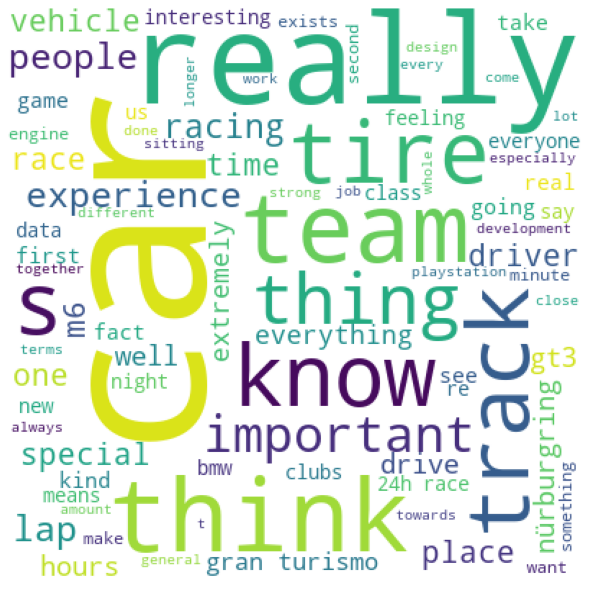

In [11]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

comment_words=''

stopwords = set(STOPWORDS) 
for val in df.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 



In [13]:
corpus
df1 = pd.DataFrame(corpus,columns=['text'])
df1


,text
0,okay matias radio check radio check
1,copy loud clear
2,okay start engine
3,george switch map map
4,go
...,...
181,think something really important take everyone...
182,team
183,data gain one thing really connection people
184,fact people connected scene called racing


In [14]:
df['Word_count']=df1['text'].apply(lambda x : len(str(x).split()))
df['text']=df1['text']
df


,text,start,duration,Word_count
0,okay matias radio check radio check,5.133,2.300,6
1,copy loud clear,8.767,1.166,3
2,okay start engine,11.733,1.734,3
3,george switch map map,23.133,2.934,4
4,go,27.000,0.667,1
...,...,...,...,...
181,think something really important take everyone...,1006.167,5.400,7
182,team,1011.567,2.100,1
183,data gain one thing really connection people,1030.933,3.767,7
184,fact people connected scene called racing,1034.700,5.500,6


In [27]:
df.describe()
df.Word_count.sum()



1012

In [116]:
df[df['duration']==10.733000]

,text,start,duration,Word_count
55,car n rburgring think car number sensor built,268.5,10.733,8


In [117]:
corpus

['okay matias radio check radio check',
 'copy loud clear',
 'okay start engine',
 'george switch map map',
 'go',
 'find surprising kind place still exists world',
 'place adult want challenged',
 'really focus moment',
 'start think race gonna end',
 'take one thing time bring car forward',
 'second second minute minute',
 'point going see checker flag',
 'seeking figure',
 'sort car modern day sport car',
 'drove part search',
 'make video game',
 'really important know real thing',
 'racing think anything',
 'know real thing experienced',
 'going experience something',
 'might well experience incredible',
 'special race team',
 'backed playstation gran turismo',
 'fact get drive kazunori one childhood hero',
 'remember think first gran turismo came',
 'played hour time',
 'part playstation gran turismo team really special',
 'game big affiliation people towards sponsorship car',
 'kazunori driving really interesting experience u',
 'know god many respect gamers',
 'avid gamer know 

In [121]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PARTH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [126]:
tagged_sentence=[]
edited_sentence=[]
for i in range(0,186):
    tagged_sentence[i] = nltk.tag.pos_tag(corpus[i].split())
    edited_sentence[i] = [word for word,tag in tagged_sentence[i] if tag != 'NNP' and tag != 'NNPS']
print(' '.join(edited_sentence))

IndexError: list assignment index out of range

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(2,3))
cvector.fit(corpus)

CountVectorizer(min_df=0.0, ngram_range=(2, 3))

In [100]:
cvector1 = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
cvector1.fit(corpus)
cvector1.get_feature_names()

['able',
 'able experience',
 'absolutely',
 'absolutely motivated',
 'achieve',
 'achieve comparability',
 'acknowledged',
 'acknowledged designer',
 'acknowledged one',
 'actually',
 'actually function',
 'actually taken',
 'add',
 'add uniqueness',
 'adjustment',
 'adult',
 'adult want',
 'advantage',
 'aerodynamically',
 'aerodynamically originated',
 'aerodynamics',
 'aerodynamics better',
 'affiliation',
 'affiliation people',
 'afterwards',
 'air',
 'air intake',
 'allowed',
 'allowed mean',
 'almost',
 'almost mechanical',
 'also',
 'also always',
 'also car',
 'also interesting',
 'also last',
 'also longer',
 'also man',
 'also partner',
 'also sent',
 'also track',
 'always',
 'always hanging',
 'always involved',
 'always requires',
 'amazing',
 'amazing thing',
 'amount',
 'amount lap',
 'amount major',
 'amount pixel',
 'analyzed',
 'analyzed spot',
 'anyone',
 'anyone experienced',
 'anything',
 'anywhere',
 'anywhere else',
 'appeal',
 'appeal even',
 'aragon',
 'aragon

In [96]:
len(cvector.get_feature_names())

1397

In [95]:
cvector.get_feature_names()

['able experience',
 'able experience enters',
 'absolutely motivated',
 'absolutely motivated brings',
 'achieve comparability',
 'achieve comparability different',
 'acknowledged designer',
 'acknowledged designer also',
 'acknowledged one',
 'acknowledged one hardest',
 'actually function',
 'actually taken',
 'actually taken practically',
 'add uniqueness',
 'add uniqueness rburgring',
 'adult want',
 'adult want challenged',
 'aerodynamically originated',
 'aerodynamics better',
 'aerodynamics better flow',
 'affiliation people',
 'affiliation people towards',
 'air intake',
 'air intake front',
 'allowed mean',
 'allowed mean vehicle',
 'almost mechanical',
 'almost mechanical beauty',
 'also always',
 'also always involved',
 'also car',
 'also car fanatic',
 'also car racing',
 'also interesting',
 'also last',
 'also last year',
 'also longer',
 'also longer wheelbase',
 'also man',
 'also partner',
 'also partner dunlop',
 'also sent',
 'also sent wireless',
 'also track',
 '

In [103]:
neg_matrix = cvector.transform(corpus)
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
word_freq = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','term_count'])
word_freq.head()


,Terms,term_count
0,gran turismo,5
1,really important,3
2,gt class,3
3,racing car,3
4,radio check,2


In [101]:
neg_matrix1 = cvector1.transform(corpus)
neg_words1 = neg_matrix1.sum(axis=0)
neg_words_freq1 = [(word, neg_words1[0, idx]) for word, idx in cvector1.vocabulary_.items()]
word_freq1 = pd.DataFrame(list(sorted(neg_words_freq1, key = lambda x: x[1], reverse=True)),columns=['Terms1,2','term_count'])

In [102]:
word_freq1.head()


,"Terms1,2",term_count
0,car,33
1,really,21
2,think,13
3,team,12
4,also,11


In [59]:

!pip install textblob

In [74]:
from textblob import TextBlob as tb
y=input("enter:")
edu=tb(y)
x=edu.sentiment.polarity
x

enter:george switch map map


0.0

In [86]:
def sentiment_val(x):
    edu=tb(x)
    z=edu.sentiment.polarity
    if z>=0.25:
        return('positive')
    elif z<0.25 and z>=0:
        return('neutral')
    elif z<0:
        return('negative')
df['sentiment']=df['text'].apply(sentiment_val)
df['sentiment'].value_counts()

neutral     112
positive     58
negative     16
Name: sentiment, dtype: int64

In [20]:
pos_matrix = cvector.transform(corpus)

In [21]:
pos_matrix

<186x1316 sparse matrix of type '<class 'numpy.int64'>'
	with 1763 stored elements in Compressed Sparse Row format>

In [147]:
pip install spacy


  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107102 sha256=34c396108cb430bca1e2c277824d4b3f827bf82423c5ed78e5079873037863f9
  Stored in directory: c:\users\parth\appdata\local\pip\cache\wheels\11\73\9a\f91ac1f1816436b16423617c5be5db048697ff152a9c4346f2
Successfully built smart-open


In [170]:
from nltk.tag import pos_tag

def propernoun(sentence):
    
    tagged_sent = pos_tag(sentence.split())
    pnouns = [word for word,pos in tagged_sent if pos == 'NNP']
    return tagged_sent
propernoun('Matias')






[('Matias', 'NNS')]

In [153]:
df1[df1['text']=='copy loud clear']['start']=propernouns


ValueError: Length of values (3) does not match length of index (1)

In [185]:
import spacy
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")
def propernoun(sentence):
    doc =nlp (sentence)
    for token in doc:
        if token.pos_== "NOUN":
            return(token)
        
y=propernoun('Matias hey how are you')
print(y)
z=nlp("hey! max how are you")
z


None


hey! max how are you

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
v = TfidfVectorizer()
x = v.fit_transform(df['text'])

In [89]:
x

<186x540 sparse matrix of type '<class 'numpy.float64'>'
	with 961 stored elements in Compressed Sparse Row format>

In [25]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [word_freq.sort_values(by='term_count', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 phrases in movie reviews')

0.0